In [1]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer

In [2]:
from google.colab import files
upload = files.upload()
df = pd.read_csv('climate_change_Final.csv')


Saving climate_change_Final.csv to climate_change_Final.csv


In [17]:
df.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC11,CFC12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [18]:
df

,Year,Month,MEI,CO2,CH4,N2O,CFC11,CFC12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...,...
462,2021,11,-1.400,415.60,1910.20,334.900,220.749,491.731,NaN,NaN,0.854
463,2021,12,-1.210,416.71,1910.60,335.100,220.709,491.711,NaN,NaN,0.751
464,2022,1,-1.020,417.38,1908.90,335.200,220.585,491.445,NaN,NaN,0.779
465,2022,2,-0.970,417.81,NaN,NaN,220.632,491.133,NaN,NaN,NaN


In [19]:
count_row = df.shape[0]  # Gives number of rows
count_col = df.shape[1]  # Gives number of columns

In [20]:
count_col

11

In [21]:
count_row


467

In [22]:
df.tail()

,Year,Month,MEI,CO2,CH4,N2O,CFC11,CFC12,TSI,Aerosols,Temp
462,2021,11,-1.40,415.60,1910.2,334.9,220.749,491.731,NaN,NaN,0.854
463,2021,12,-1.21,416.71,1910.6,335.1,220.709,491.711,NaN,NaN,0.751
464,2022,1,-1.02,417.38,1908.9,335.2,220.585,491.445,NaN,NaN,0.779
465,2022,2,-0.97,417.81,NaN,NaN,220.632,491.133,NaN,NaN,NaN
466,2022,3,-1.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.dtypes

Year          int64
Month         int64
MEI         float64
CO2         float64
CH4         float64
N2O         float64
CFC11       float64
CFC12       float64
TSI         float64
Aerosols    float64
Temp        float64
dtype: object

In [24]:
#object data type (for storing mixed data like numbers, strings, etc.)
df.dtypes.value_counts()



float64    9
int64      2
dtype: int64

In [25]:
df = df.dropna()


In [26]:
df

,Year,Month,MEI,CO2,CH4,N2O,CFC11,CFC12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


In [27]:
df = df.drop(['TSI', 'Aerosols'], axis=1)

In [28]:
missing = pd.DataFrame(df.isnull().sum())      #returns the number of missing values in the dataset.
missing = missing.reset_index()
missing

,index,0
0,Year,0
1,Month,0
2,MEI,0
3,CO2,0
4,CH4,0
5,N2O,0
6,CFC11,0
7,CFC12,0
8,Temp,0


In [29]:
df

,Year,Month,MEI,CO2,CH4,N2O,CFC11,CFC12,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,0.149
...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,0.394


In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 0 to 307
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    308 non-null    int64  
 1   Month   308 non-null    int64  
 2   MEI     308 non-null    float64
 3   CO2     308 non-null    float64
 4   CH4     308 non-null    float64
 5   N2O     308 non-null    float64
 6   CFC11   308 non-null    float64
 7   CFC12   308 non-null    float64
 8   Temp    308 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 24.1 KB


In [31]:
df.describe()


,Year,Month,MEI,CO2,CH4,N2O,CFC11,CFC12,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,0.739000


In [32]:
df['Year'].value_counts()


1996    12
1984    12
2007    12
2006    12
2005    12
2004    12
2003    12
2002    12
2001    12
2000    12
1999    12
1998    12
1997    12
2008    12
1995    12
1994    12
1993    12
1992    12
1991    12
1990    12
1989    12
1988    12
1987    12
1986    12
1985    12
1983     8
Name: Year, dtype: int64

In [33]:
# check the correlation among all variables
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

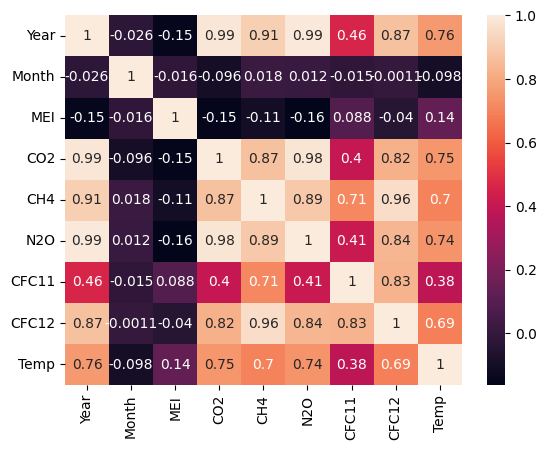

In [34]:
sns.heatmap(df.corr(),annot=True)

In [36]:
# Target Variable
formula1 = (df['CO2']*1000/60)
formula2 = df['CH4'] + df['N2O'] + df['CFC12'] + df['CFC11'] + df['MEI']
df['Temp'] = formula1 - formula2
df.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC11,CFC12,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,3279.740000
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,3275.138667
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,3250.534333
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,3218.612667
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,3164.914000


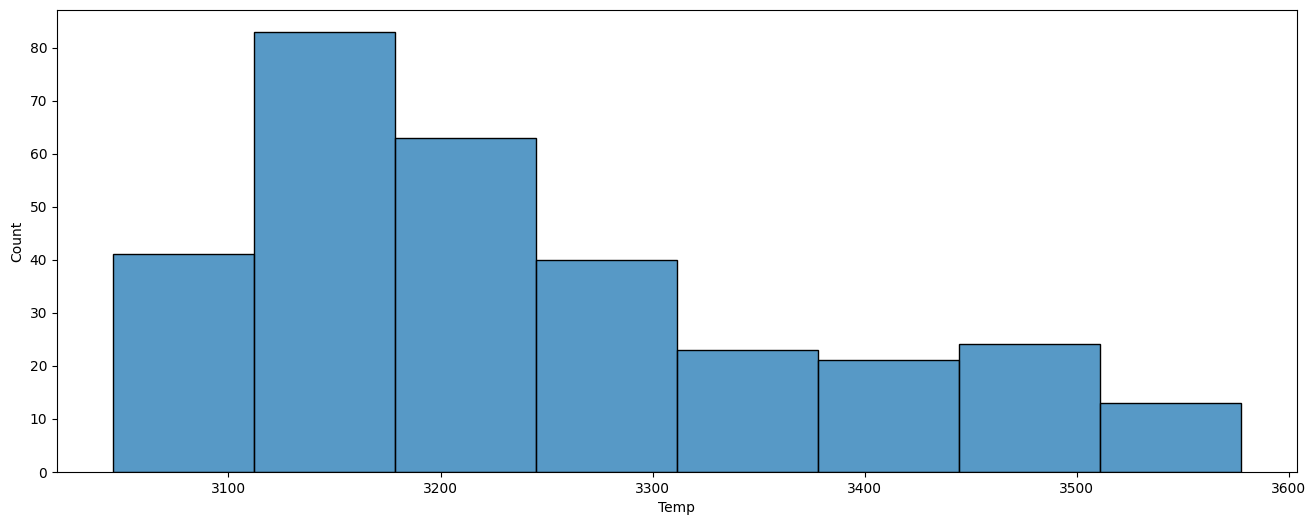

In [37]:
# Histogram of the target variables

plt.figure(figsize=(16,6))
sns.histplot(data=df, x='Temp', bins=8)
plt.show()

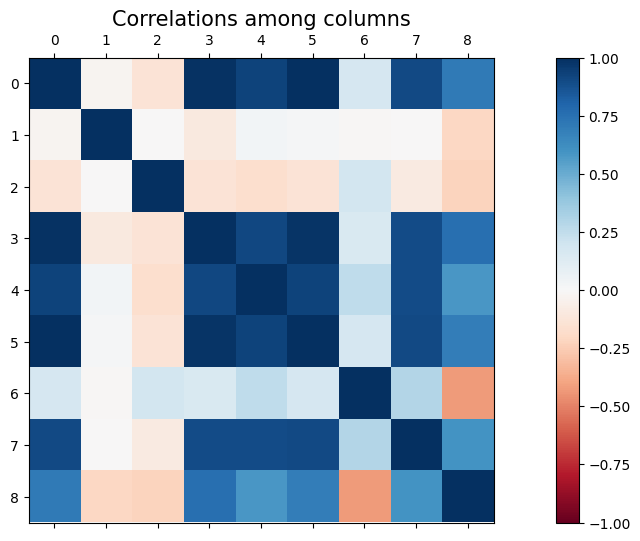

In [39]:
# Correlations among columns
plt.figure(figsize=(16,6))
plt.matshow(df.corr(method='spearman'),vmax=1,vmin=-1,cmap='RdBu',fignum=1)
plt.title('Correlations among columns', size=15)
plt.colorbar()
plt.show()

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics #mean_squared_error

X = df[["CO2", "CH4", "N2O", "CFC12", "CFC11", "MEI","Year"]]
X

,CO2,CH4,N2O,CFC12,CFC11,MEI,Year
0,345.96,1638.59,303.677,350.113,191.324,2.556,1983
1,345.52,1633.71,303.746,351.848,192.057,2.167,1983
2,344.15,1633.22,303.795,353.725,192.818,1.741,1983
3,342.25,1631.35,303.839,355.633,193.602,1.130,1983
4,340.17,1648.40,303.901,357.465,194.392,0.428,1983
...,...,...,...,...,...,...,...
303,384.15,1779.88,321.405,535.072,244.200,-0.266,2008
304,383.09,1795.08,321.529,535.048,244.083,-0.643,2008
305,382.99,1814.18,321.796,534.927,244.080,-0.780,2008
306,384.13,1812.37,322.013,534.906,244.225,-0.621,2008


In [42]:
y = df.Temp
y

0      3279.740000
1      3275.138667
2      3250.534333
3      3218.612667
4      3164.914000
          ...     
303    3522.209000
304    3489.736333
305    3468.963667
306    3489.273667
307    3512.395000
Name: Temp, Length: 308, dtype: float64

In [83]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
# partition the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(X_train[["CO2", "CH4", "N2O", "CFC12", "CFC11", "MEI","Year"]])
X_test_minmax=min_max.fit_transform(X_test[["CO2", "CH4", "N2O", "CFC12", "CFC11", "MEI","Year"]])

# construct a regression tree from the training data
clf = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_features= 7, bootstrap=True)
model = clf.fit(X_train, y_train)

# test the regression tree
pred = clf.predict(X_test)

In [84]:
random_forest_out_of_bag = RandomForestRegressor(oob_score=True)
random_forest_out_of_bag.fit(X_train, y_train)
print(random_forest_out_of_bag.oob_score_)

0.985637213793129


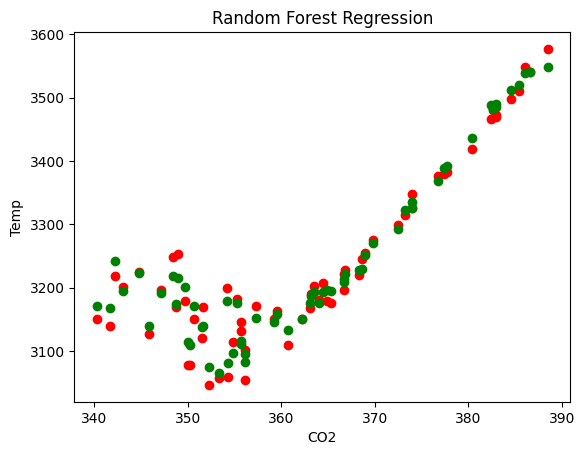

In [81]:
plt.scatter(X_test['CO2'].values, y_test, color = 'red')
plt.scatter(X_test['CO2'].values, pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('CO2')
plt.ylabel('Temp')
plt.show()

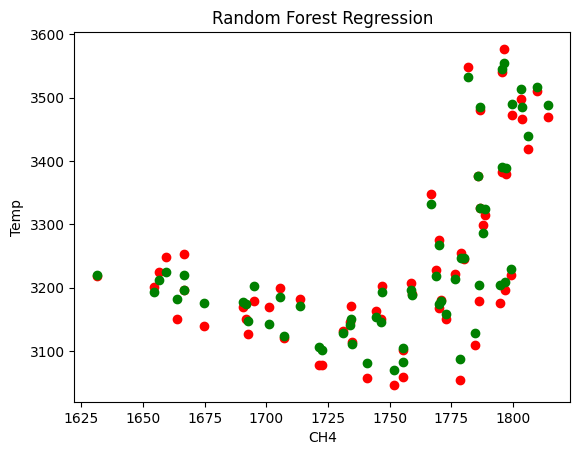

In [59]:
plt.scatter(X_test['CH4'].values, y_test, color = 'red')
plt.scatter(X_test['CH4'].values, pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('CH4')
plt.ylabel('Temp')
plt.show()

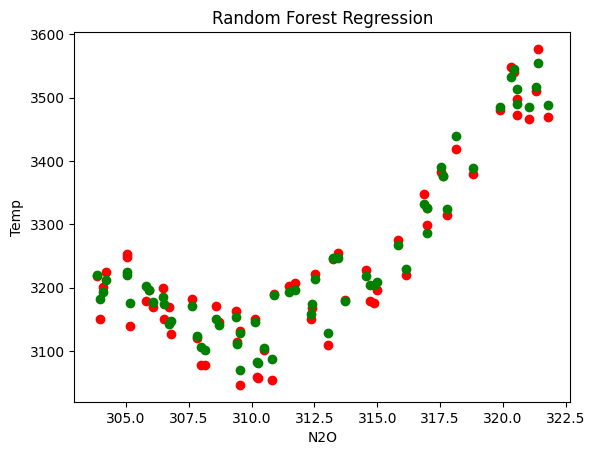

In [60]:

plt.scatter(X_test['N2O'].values, y_test, color = 'red')
plt.scatter(X_test['N2O'].values, pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('N2O')
plt.ylabel('Temp')
plt.show()

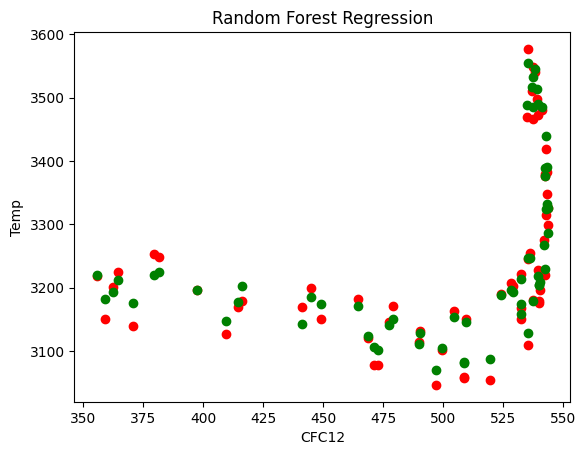

In [61]:
plt.scatter(X_test['CFC12'].values, y_test, color = 'red')
plt.scatter(X_test['CFC12'].values, pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('CFC12')
plt.ylabel('Temp')
plt.show()

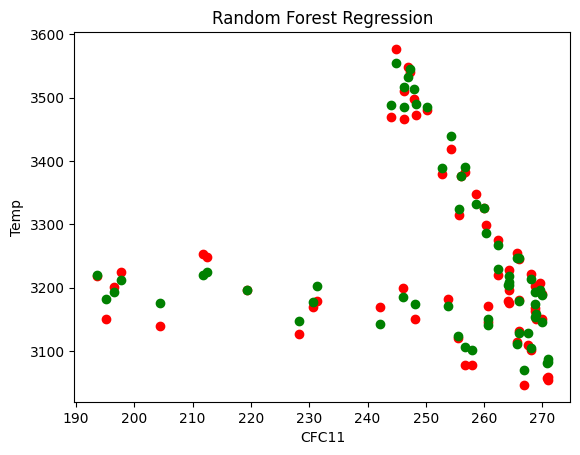

In [62]:
plt.scatter(X_test['CFC11'].values, y_test, color = 'red')
plt.scatter(X_test['CFC11'].values, pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('CFC11')
plt.ylabel('Temp')
plt.show()

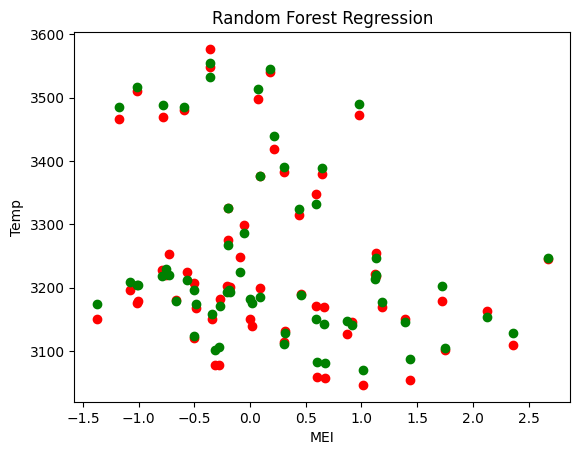

In [63]:
plt.scatter(X_test['MEI'].values, y_test, color = 'red')
plt.scatter(X_test['MEI'].values, pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('MEI')
plt.ylabel('Temp')
plt.show()

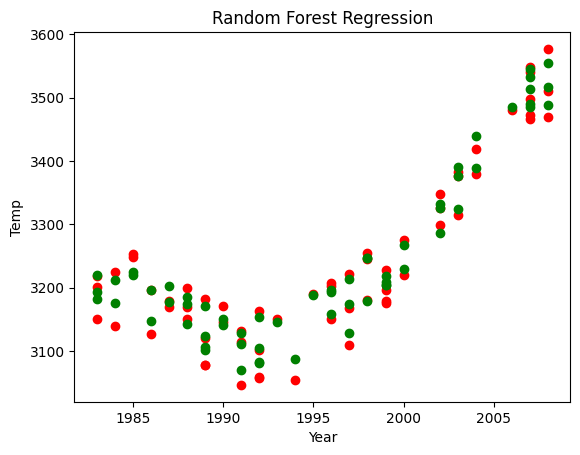

In [64]:
plt.scatter(X_test['Year'].values, y_test, color = 'red')
plt.scatter(X_test['Year'].values, pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Year')
plt.ylabel('Temp')
plt.show()

In [85]:
from sklearn.metrics import mean_squared_error
# calculate the RMSE
print(mean_squared_error(y_test, pred)**0.5)

15.815875150502197


In [86]:
from sklearn.metrics import r2_score
# Evaluate Coefficient of determination
R2 = r2_score(y_test, pred)

# Print metric
print('Coefficient of determination =', R2)

Coefficient of determination = 0.9867196888659636


In [87]:
from sklearn.metrics import mean_absolute_error
# Evaluate Mean absolute error

MAE = mean_absolute_error(y_test, pred)


# Print metric
print('Mean absolute error =', MAE)

Mean absolute error = 13.336339516128609


In [88]:
prediction = clf.predict(X_train)
mse = mean_squared_error(y_test, pred)
rmse = mse**.5
print(mse)
print(rmse)

250.14190677627292
15.815875150502197


In [89]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

# predicting a new value

# test the output by changing values, like 3750
y_pred = regressor.predict(X_test)

# print the predicted price
print(y_pred)

[3558.95066667 3188.33       3102.25733333 3190.46533333 3203.15033333
 3188.78833333 3106.25466667 3167.161      3314.724      3210.59766667
 3114.34133333 3132.08       3485.43533333 3489.73633333 3485.43533333
 3531.261      3147.85566667 3190.165      3186.45466667 3209.65366667
 3141.474      3069.30466667 3087.07033333 3276.209      3089.82533333
 3138.27666667 3062.14266667 3179.91466667 3471.67433333 3440.48533333
 3160.14566667 3164.914      3152.653      3382.80833333 3158.80233333
 3065.93266667 3185.12333333 3147.85566667 3196.681      3128.41866667
 3107.46766667 3203.15033333 3247.02166667 3376.08333333 3501.11966667
 3223.958      3327.45033333 3188.33       3511.232      3089.82533333
 3062.14266667 3382.80833333 3186.68633333 3152.653      3247.02166667
 3348.74466667 3571.48766667 3196.681      3223.958      3232.62566667
 3294.74633333 3186.45466667]


In [90]:
from sklearn.metrics import mean_squared_error
# calculate the RMSE

prediction1= regressor.predict(X_train)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**.5
print(mse)
print(rmse)

495.7867906075254
22.266270244644147


In [91]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [92]:
import xgboost


In [134]:
print(xgboost.__version__)

1.7.5


In [135]:
from xgboost import XGBRegressor



In [136]:
xmodel = XGBRegressor()

In [137]:
import pandas  as pd
import numpy   as np
import xgboost as xgb

In [138]:
boostreg =xgb.XGBRegressor(eval_metric='rmse')


In [139]:
from sklearn.model_selection import GridSearchCV


In [140]:
xmodel = XGBRegressor(n_estimators=400, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.9)


In [141]:
xmodel.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [142]:
predictions = xmodel.predict(X_test)


In [143]:


from sklearn.metrics import mean_squared_log_error
RMSLE = np.sqrt( mean_squared_log_error(y_test, predictions) )
print("The score is %.5f" % RMSLE )

The score is 0.00421


In [144]:
print(metrics.r2_score(y_test, predictions))


0.9905902022630491


In [154]:
from sklearn.metrics import mean_squared_error
# calculate the RMSE

pp = xmodel.predict(X_train)
mse = mean_squared_error(y_test, predictions)
rmse = mse**.5
print(mse)
print(rmse)

177.2386749484665
13.313101627662371


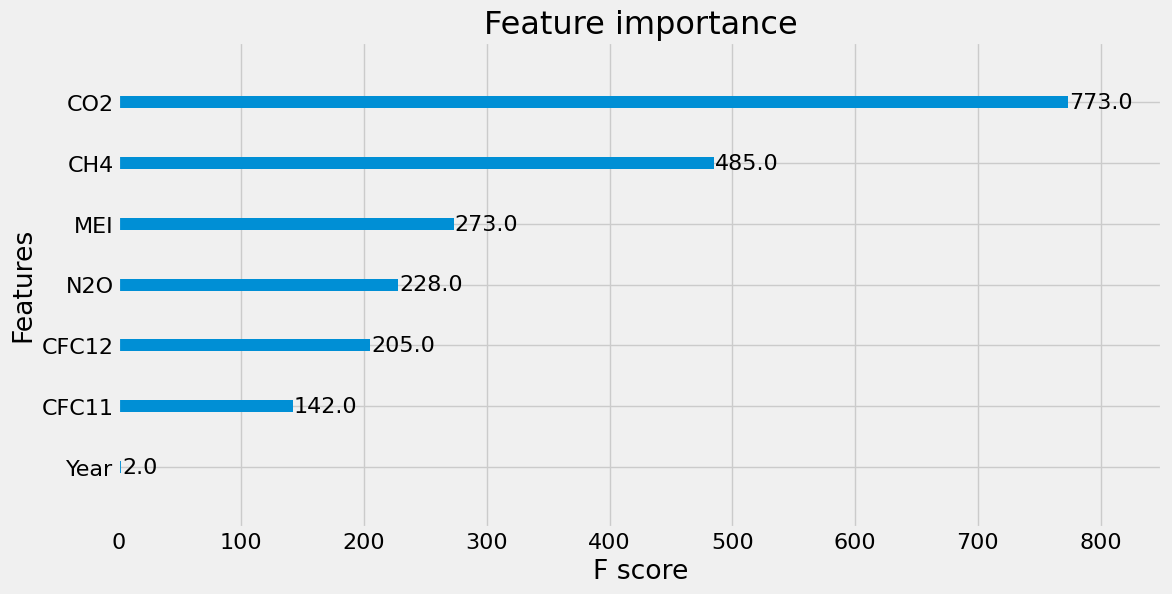

In [155]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(regressor, max_num_features=8, ax=ax)
plt.show();

In [146]:
plt.figure(figsize=(10,10))


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [147]:
plt.show()
plt.show(xmodel)


In [148]:
temp_dmatrix = xgb.DMatrix(data=X, label=y)
params = {"objective":"reg:linear", "max_depth":2}


In [156]:
# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-valdiation: cv_results
cv_results = xgb.cv(dtrain=temp_dmatrix, params=params, nfold=4,
                    num_boost_round=3, metrics='rmse', as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results['test-rmse-mean']).tail(1))

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0      2276.858102        2.828343     2276.829991      13.160286
1      1599.467974        2.030182     1599.427445      14.035842
2      1124.982835        1.410972     1125.238070      11.794041
2    1125.23807
Name: test-rmse-mean, dtype: float64
